#IMPORT LIBRARY

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#LOAD DATASET YANG DIPILIH

In [11]:

# Load dataset
df = pd.read_csv("Social Media Engagement Dataset.csv")
df.head()


,post_id,timestamp,day_of_week,platform,user_id,location,language,text_content,hashtags,mentions,...,comments_count,impressions,engagement_rate,brand_name,product_name,campaign_name,campaign_phase,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate
0,kcqbs6hxybia,2024-12-09 11:26:15,Monday,Instagram,user_52nwb0a6,"Melbourne, Australia",pt,Just tried the Chromebook from Google. Best pu...,#Food,NaN,...,701,18991,0.19319,Google,Chromebook,BlackFriday,Launch,0.0953,-0.3672,19.1
1,vkmervg4ioos,2024-07-28 19:59:26,Sunday,Twitter,user_ucryct98,"Tokyo, Japan",ru,Just saw an ad for Microsoft Surface Laptop du...,"#MustHave, #Food","@CustomerService, @BrandCEO",...,359,52764,0.05086,Microsoft,Surface Laptop,PowerRelease,Post-Launch,0.1369,-0.4510,-42.6
2,memhx4o1x6yu,2024-11-23 14:00:12,Saturday,Reddit,user_7rrev126,"Beijing, China",ru,What's your opinion about Nike's Epic React? ...,"#Promo, #Food, #Trending",NaN,...,643,8887,0.45425,Nike,Epic React,BlackFriday,Post-Launch,0.2855,-0.4112,17.4
3,bhyo6piijqt9,2024-09-16 04:35:25,Monday,YouTube,user_4mxuq0ax,"Lagos, Nigeria",en,Bummed out with my new Diet Pepsi from Pepsi! ...,"#Reviews, #Sustainable","@StyleGuide, @BrandSupport",...,743,6696,0.42293,Pepsi,Diet Pepsi,LaunchWave,Launch,-0.2094,-0.0167,-5.5
4,c9dkiomowakt,2024-09-05 21:03:01,Thursday,Twitter,user_l1vpox2k,"Berlin, Germany",hi,Just tried the Corolla from Toyota. Absolutely...,"#Health, #Travel","@BrandSupport, @InfluencerName",...,703,47315,0.08773,Toyota,Corolla,LocalTouchpoints,Launch,0.6867,0.0807,38.8


#VALIDASI DAN EKSPLORASI DATA AWAL

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   post_id                  12000 non-null  object 
 1   timestamp                12000 non-null  object 
 2   day_of_week              12000 non-null  object 
 3   platform                 12000 non-null  object 
 4   user_id                  12000 non-null  object 
 5   location                 12000 non-null  object 
 6   language                 12000 non-null  object 
 7   text_content             12000 non-null  object 
 8   hashtags                 12000 non-null  object 
 9   mentions                 8059 non-null   object 
 10  keywords                 12000 non-null  object 
 11  topic_category           12000 non-null  object 
 12  sentiment_score          12000 non-null  float64
 13  sentiment_label          12000 non-null  object 
 14  emotion_type          

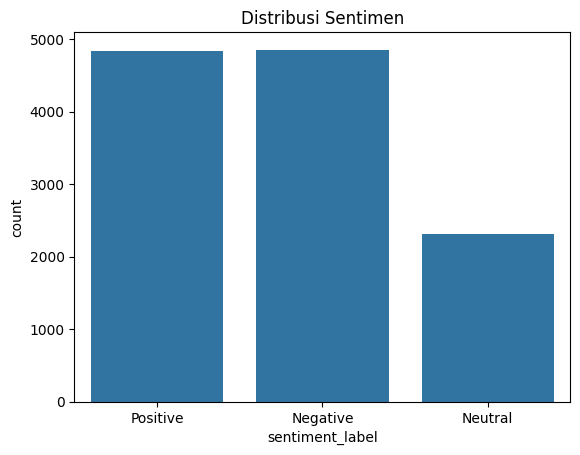

In [12]:
df.info()
df.isnull().sum()

# Visualisasi distribusi label
sns.countplot(x='sentiment_label', data=df)
plt.title("Distribusi Sentimen")
plt.show()

#PRA PEMROSESAN DATA

In [13]:
features = [
    'sentiment_score', 'toxicity_score', 'likes_count',
    'shares_count', 'comments_count', 'engagement_rate',
    'user_past_sentiment_avg', 'user_engagement_growth', 'buzz_change_rate'
]
target_column = 'sentiment_label'

X = df[features]
y = df[target_column]

# Encode label
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


#KNN CLASSIFIER

KNN Report
              precision    recall  f1-score   support

    Negative       0.88      0.93      0.90       946
     Neutral       0.67      0.58      0.62       433
    Positive       0.94      0.94      0.94      1021

    accuracy                           0.87      2400
   macro avg       0.83      0.82      0.82      2400
weighted avg       0.87      0.87      0.87      2400



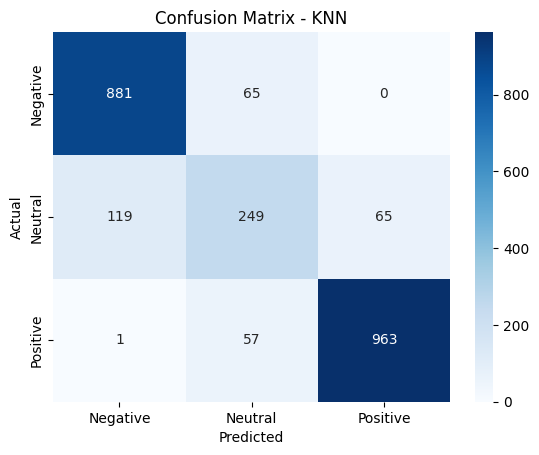

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Report")
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))

cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#DECISION TREE

Decision Tree Report
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       946
     Neutral       1.00      1.00      1.00       433
    Positive       1.00      1.00      1.00      1021

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00      2400



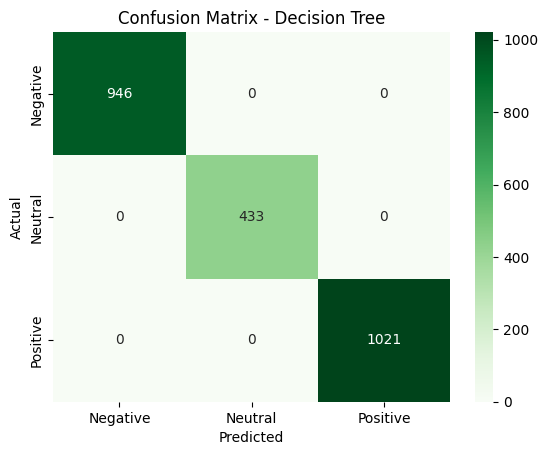

In [16]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_tree = dtree.predict(X_test)

print("Decision Tree Report")
print(classification_report(y_test, y_pred_tree, target_names=le.classes_))

cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Greens')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#SUPPORT VECTOR MACHINE

SVM Report
              precision    recall  f1-score   support

    Negative       0.98      0.98      0.98       946
     Neutral       0.93      0.93      0.93       433
    Positive       0.99      0.99      0.99      1021

    accuracy                           0.97      2400
   macro avg       0.97      0.97      0.97      2400
weighted avg       0.97      0.97      0.97      2400



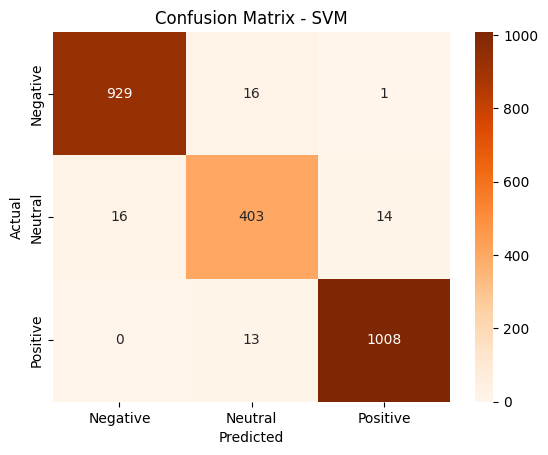

In [17]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Report")
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))

cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Oranges')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#VISUALISASI DAN KLASIFIKASI DATA

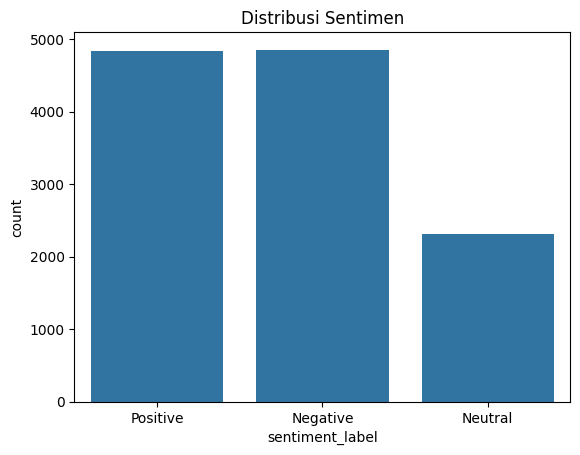

In [18]:

# Visualisasi distribusi label sentimen
sns.countplot(data=df, x='sentiment_label')
plt.title('Distribusi Sentimen')
plt.show()


In [19]:

# Pilih fitur dan target
features = [
    'sentiment_score', 'toxicity_score', 'likes_count',
    'shares_count', 'comments_count', 'engagement_rate',
    'user_past_sentiment_avg', 'user_engagement_growth', 'buzz_change_rate'
]
target_column = 'sentiment_label'

X = df[features]
y = df[target_column]

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)


In [20]:

# Latih model KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Prediksi
y_pred = knn.predict(X_test)

# Evaluasi
print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

    Negative       0.88      0.93      0.90       946
     Neutral       0.67      0.58      0.62       433
    Positive       0.94      0.94      0.94      1021

    accuracy                           0.87      2400
   macro avg       0.83      0.82      0.82      2400
weighted avg       0.87      0.87      0.87      2400



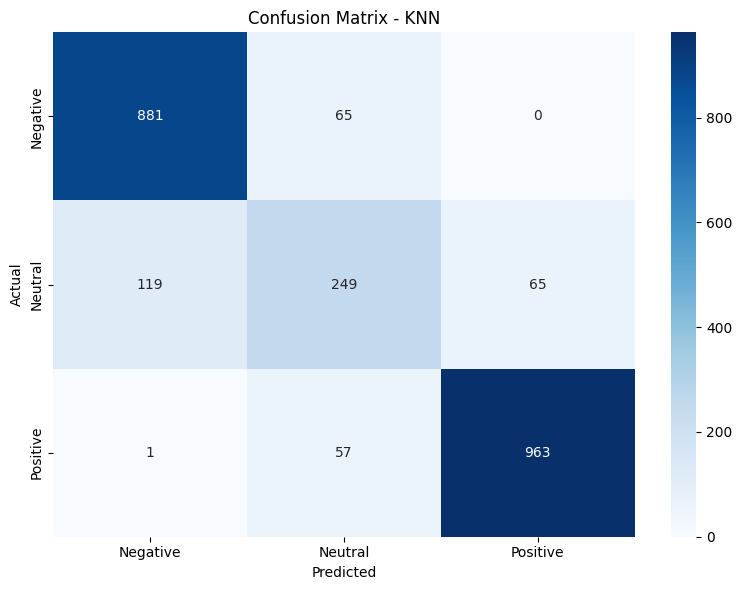

In [21]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.tight_layout()
plt.show()
